In [ ]:
#TensorFlow libraries import
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Class/labels - Name of labels we will use to classify the images, there are 6 different labels
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea',
               'street']

In [ ]:
#Dataset Directories - Here we have the train, test and pred sets, these lines contains the path to the folders
base_dir = "/content/drive/My Drive/Projects/Intel/seg_train/seg_train"
validation_dir = "/content/drive/My Drive/Projects/Intel/seg_test/seg_test"
pred_dir = "/content/drive/My Drive/Projects/Intel/seg_pred/"

In [ ]:
#Image Data Generator - Here we Import ImageDataGenerator to change the image scale (255 pixels rgb)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0 /255)
test_datagen = ImageDataGenerator(rescale = 1.0 /255)
pred_datagen = ImageDataGenerator(rescale = 1.0 /255)

In [ ]:
#Image Data Generator - Generator
#Here we use the Generators, this tool does a search in the informed folders and uses the images found as sets
train_generator = train_datagen.flow_from_directory(base_dir,batch_size=20,class_mode="binary", shuffle=False, target_size=(150,150))
valid_generator = valid_generator.flow_from_directory(validation_dir,batch_size=20,class_mode="binary", shuffle=False, target_size=(150,150))
pred_generator = pred_generator.flow_from_directory(pred_dir,batch_size=20,class_mode="binary", shuffle=False, target_size=(150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [ ]:
#Model Sequential
#Here we start the building of our Model with the Sequential
model = models.Sequential()

In [ ]:
#Added 1 Conv Layer with 32 filters and activation relu
model.add(layers.Conv2D(32,(3,3), activation="relu",input_shape=(150,150,3)))
#Added a MaxPooling2d that halves the image size
model.add(layers.MaxPooling2D((2,2)))
#1 Conv Layer with 64 filters with Strides 2x2 that also halves the image
model.add(layers.Conv2D(64,(3,3), strides=(2,2), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
#Last Conv Layer with 128 filters
model.add(layers.Conv2D(128,(3,3), strides=(2,2), activation="relu"))

In [ ]:
#Summary of our Model, with all Features and Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Here we input our conventional Neural Network, starting with a Flatten
model.add(layers.Flatten())

In [ ]:
#Two Dense Layers before the Output Layer 
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
#Softmax to Output probabilities about each label
model.add(layers.Dense(6,activation='softmax'))

In [ ]:
#Adam optimizer was used for compilation and I opted for the accuracy metric as usual
import numpy as np
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Here we started our model training, using 21 epochs, 50 validation_steps and no callbacks
history = model.fit(train_generator, validation_data=valid_generator, epochs=21, validation_steps=50,verbose=1)

Epoch 1/21
702/702 [==============================] - 12523s 18s/step - loss: 1.6822 - accuracy: 0.3328 - val_loss: 1.4884 - val_accuracy: 0.5690
Epoch 2/21
702/702 [==============================] - 245s 349ms/step - loss: 1.5347 - accuracy: 0.5026 - val_loss: 1.3003 - val_accuracy: 0.7450
Epoch 3/21
702/702 [==============================] - 243s 347ms/step - loss: 1.4862 - accuracy: 0.5527 - val_loss: 1.3511 - val_accuracy: 0.6910
Epoch 4/21
702/702 [==============================] - 243s 346ms/step - loss: 1.4733 - accuracy: 0.5660 - val_loss: 1.4983 - val_accuracy: 0.5450
Epoch 5/21
702/702 [==============================] - 242s 345ms/step - loss: 1.4612 - accuracy: 0.5790 - val_loss: 1.2978 - val_accuracy: 0.7430
Epoch 6/21
702/702 [==============================] - 244s 347ms/step - loss: 1.4421 - accuracy: 0.5976 - val_loss: 1.2906 - val_accuracy: 0.7540
Epoch 7/21
702/702 [==============================] - 244s 347ms/step - loss: 1.4246 - accuracy: 0.6132 - val_loss: 1.2783 -

We get an accuracy of approximately 0.80, which is very good!!!!

In [ ]:
#Size of the pred set
gui = len(pred_generator)

In [ ]:
#Here we start the predict of the prediction set
predict = model.predict_generator(pred_generator,gui)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
#based on the prediction, we look for the file names
cl = np.round(predict)
filenames=pred_generator.filenames

In [ ]:
#Import for random numbers
from random import seed
from random import randint

In [ ]:
seed(1)

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['randint', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


the image label is: mountain


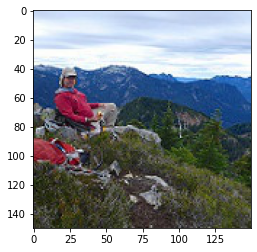

the image label is: glacier


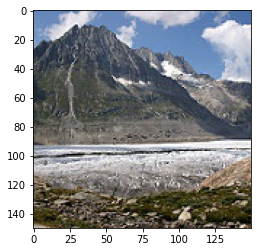

the image label is: forest


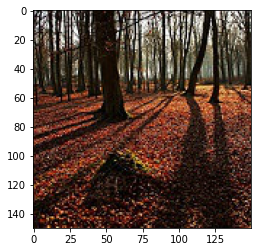

the image label is: street


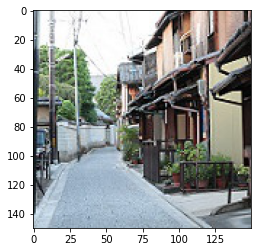

the image label is: sea


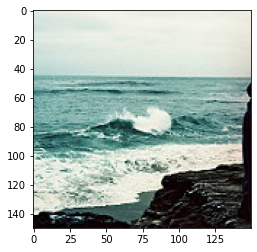

the image label is: forest


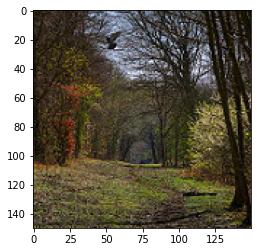

the image label is: forest


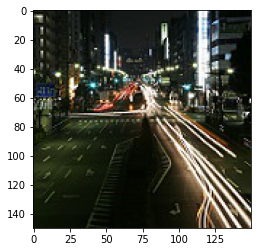

the image label is: forest


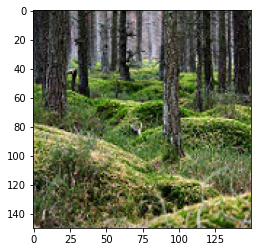

the image label is: glacier


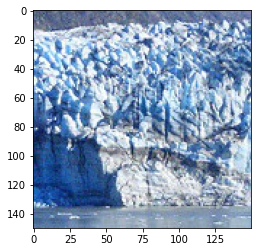

the image label is: buildings


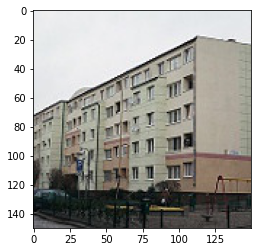

In [ ]:
#Finally we plot 15 random images with their respective labels predicted by the CNN!
for _ in range(15):
  value = randint(0, 7000)
  img = mpimg.imread(pred_dir + filenames[value] )
  imgplot = plt.imshow(img)
  print("the image label is: " + class_names[np.argmax(predict[value])])
  plt.show()